# Task description 

I was tasked with building an object detection algorithm that computes the location of a phone on a floor from a single RGB camera image. 

I was supplied with a collection of images of phones, such as the following, together with the coordinates of the phone in each image. 


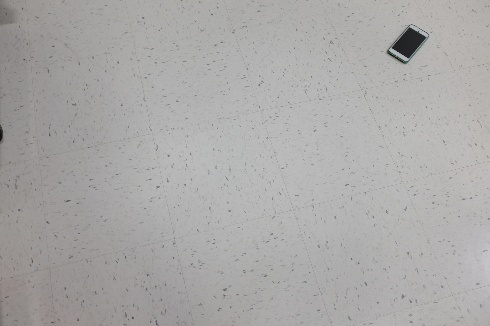

In [1]:
from PIL import Image
Image.open('./data/0.jpg')

# Programming environment

I set up a `conda` environment on my Macbook Pro as follows:

```
conda create -n cv python=2.7 opencv Pillow matplotlib pandas ipython-notebook
conda install -c conda-forge tensorflow
conda install scikit-learn
```


# Training and testing an image classifier

I used the given images together with the coordinates of the phone in each image to create a collection of thumbnails (windows, sub-images) each of which either contained a phone or didn't. Additionally, each thumbnail was labeled: 'positive' if the thumbnail contained a phone or 'negative' if it didn't. This data set was split into training and testing subsets. The training set was used to train a logistic regression model to classify thumbnails as containing a phone or not. Visual examination of a small set of images revealed that the classifier worked well:

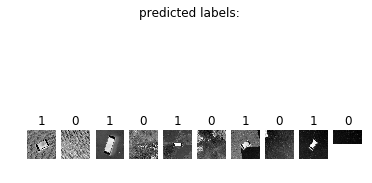

In [2]:
from train_phone_finder import train_and_test_model
train_and_test_model('./data')

# Object detection algorithm

Having trained an image classifer, the next step was to use it to detect the location of the phone in an image. This was done by sliding a window across the image, extracting the sub-image defined by the window, and then running that thumbnail through the image classifier. I declared the window locations for the which the thumbnail was most likely to contain a phone (as judged by the classifier) to be the predicted location of the phone in the image. Here is an example in which the phone was successfully located using this approach: 



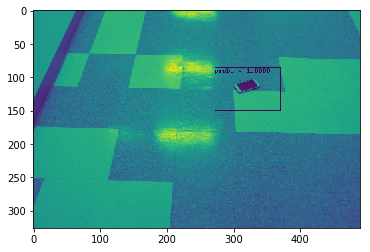

(0.6551020408163265, 0.36122448979591837)

In [3]:
from find_phone import scan
scan('./data/8.jpg')

Using the test set of images, I computed the accuracy of the object-detection algorithm. It worked surprisingly well: 

In [4]:
from find_phone_accuracy import accuracy
accuracy()

accuracy of object detection algorithm = 84.6 %
number of testing examples =  26


# Future directions

I would first plot some learning curves to assess the extent to which I am overfitting or underfitting the data. For example, I would take ever larger portions of the training set, train the classifier on those training subsets, and compute object detection error for each. This would allow me to plot training and test error as a function of training set size. In the limit of infinite training set size, these curves should approach a common value arising mostly from the bias in my choice of model. If I have find that the learning curves converge to a value above the desired error, then the model is suffering from high bias. If the curves don't converge, then that is a signal that the model is suffering from high variance. 

If the model is suffering from high variance, then one remedy is to increase the regularization parameter. Another rememdy is to increase the size of the data set as it is quite small relative to the number of features that are needed to train an image classifier. Concretely, even a human would need at least a 20 $\times$ 20 pixel thumbnail (400 features) to have a decent chance of identifying a phone. On the other hand, the number of images is less than 200. 

One approach is to acquire more data. Another is to augment the existing data set by creating artificial images from the given images. This could be done by rotating, blurring, and stretching the given images. 

If the above measures resulted in a significantly larger data set (say 100-fold larger), and I deduced from learning curves that the model now had high bias, then I would next train a fully-connected 3-layer neural network. The most expedient implementation would probably be in `Keras`. If image-classification accuracy was still an issue, I would next try a [convolutional neural network](https://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/). 

The algorithm I implemented assumed that the phone appears in each image at about the same size relative to the image size. This approach seemed to work well. I did however notice that there was some variation in the relative size of the phone. If one was interested in additional incremental increases in classification accuracy, I would consider adding a second loop in the window-sliding scan in which I would scan down-sampled copies of the original image, or equivalently, repeatedly scan using various window sizes. This procedure is known as pyramiding. 

Another thing I noticed was that mis-classifications often resulted from the classifier confusing the edge of a carpet, or tiled floor, or tape on the floor, with a phone. This could be ameliorated by adding extra features to the model designed to distinguish between this class of objects and a phone. 